___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [2]:
df=pd.read_csv("C:\\Users\\Likshvit\\Desktop\\datafiles\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Python-Data-Science-and-Machine-Learning-Bootcamp\\Machine Learning Sections\\K-Nearest-Neighbors\\KNN_Project_Data")

**Check the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

LinAlgError: singular matrix

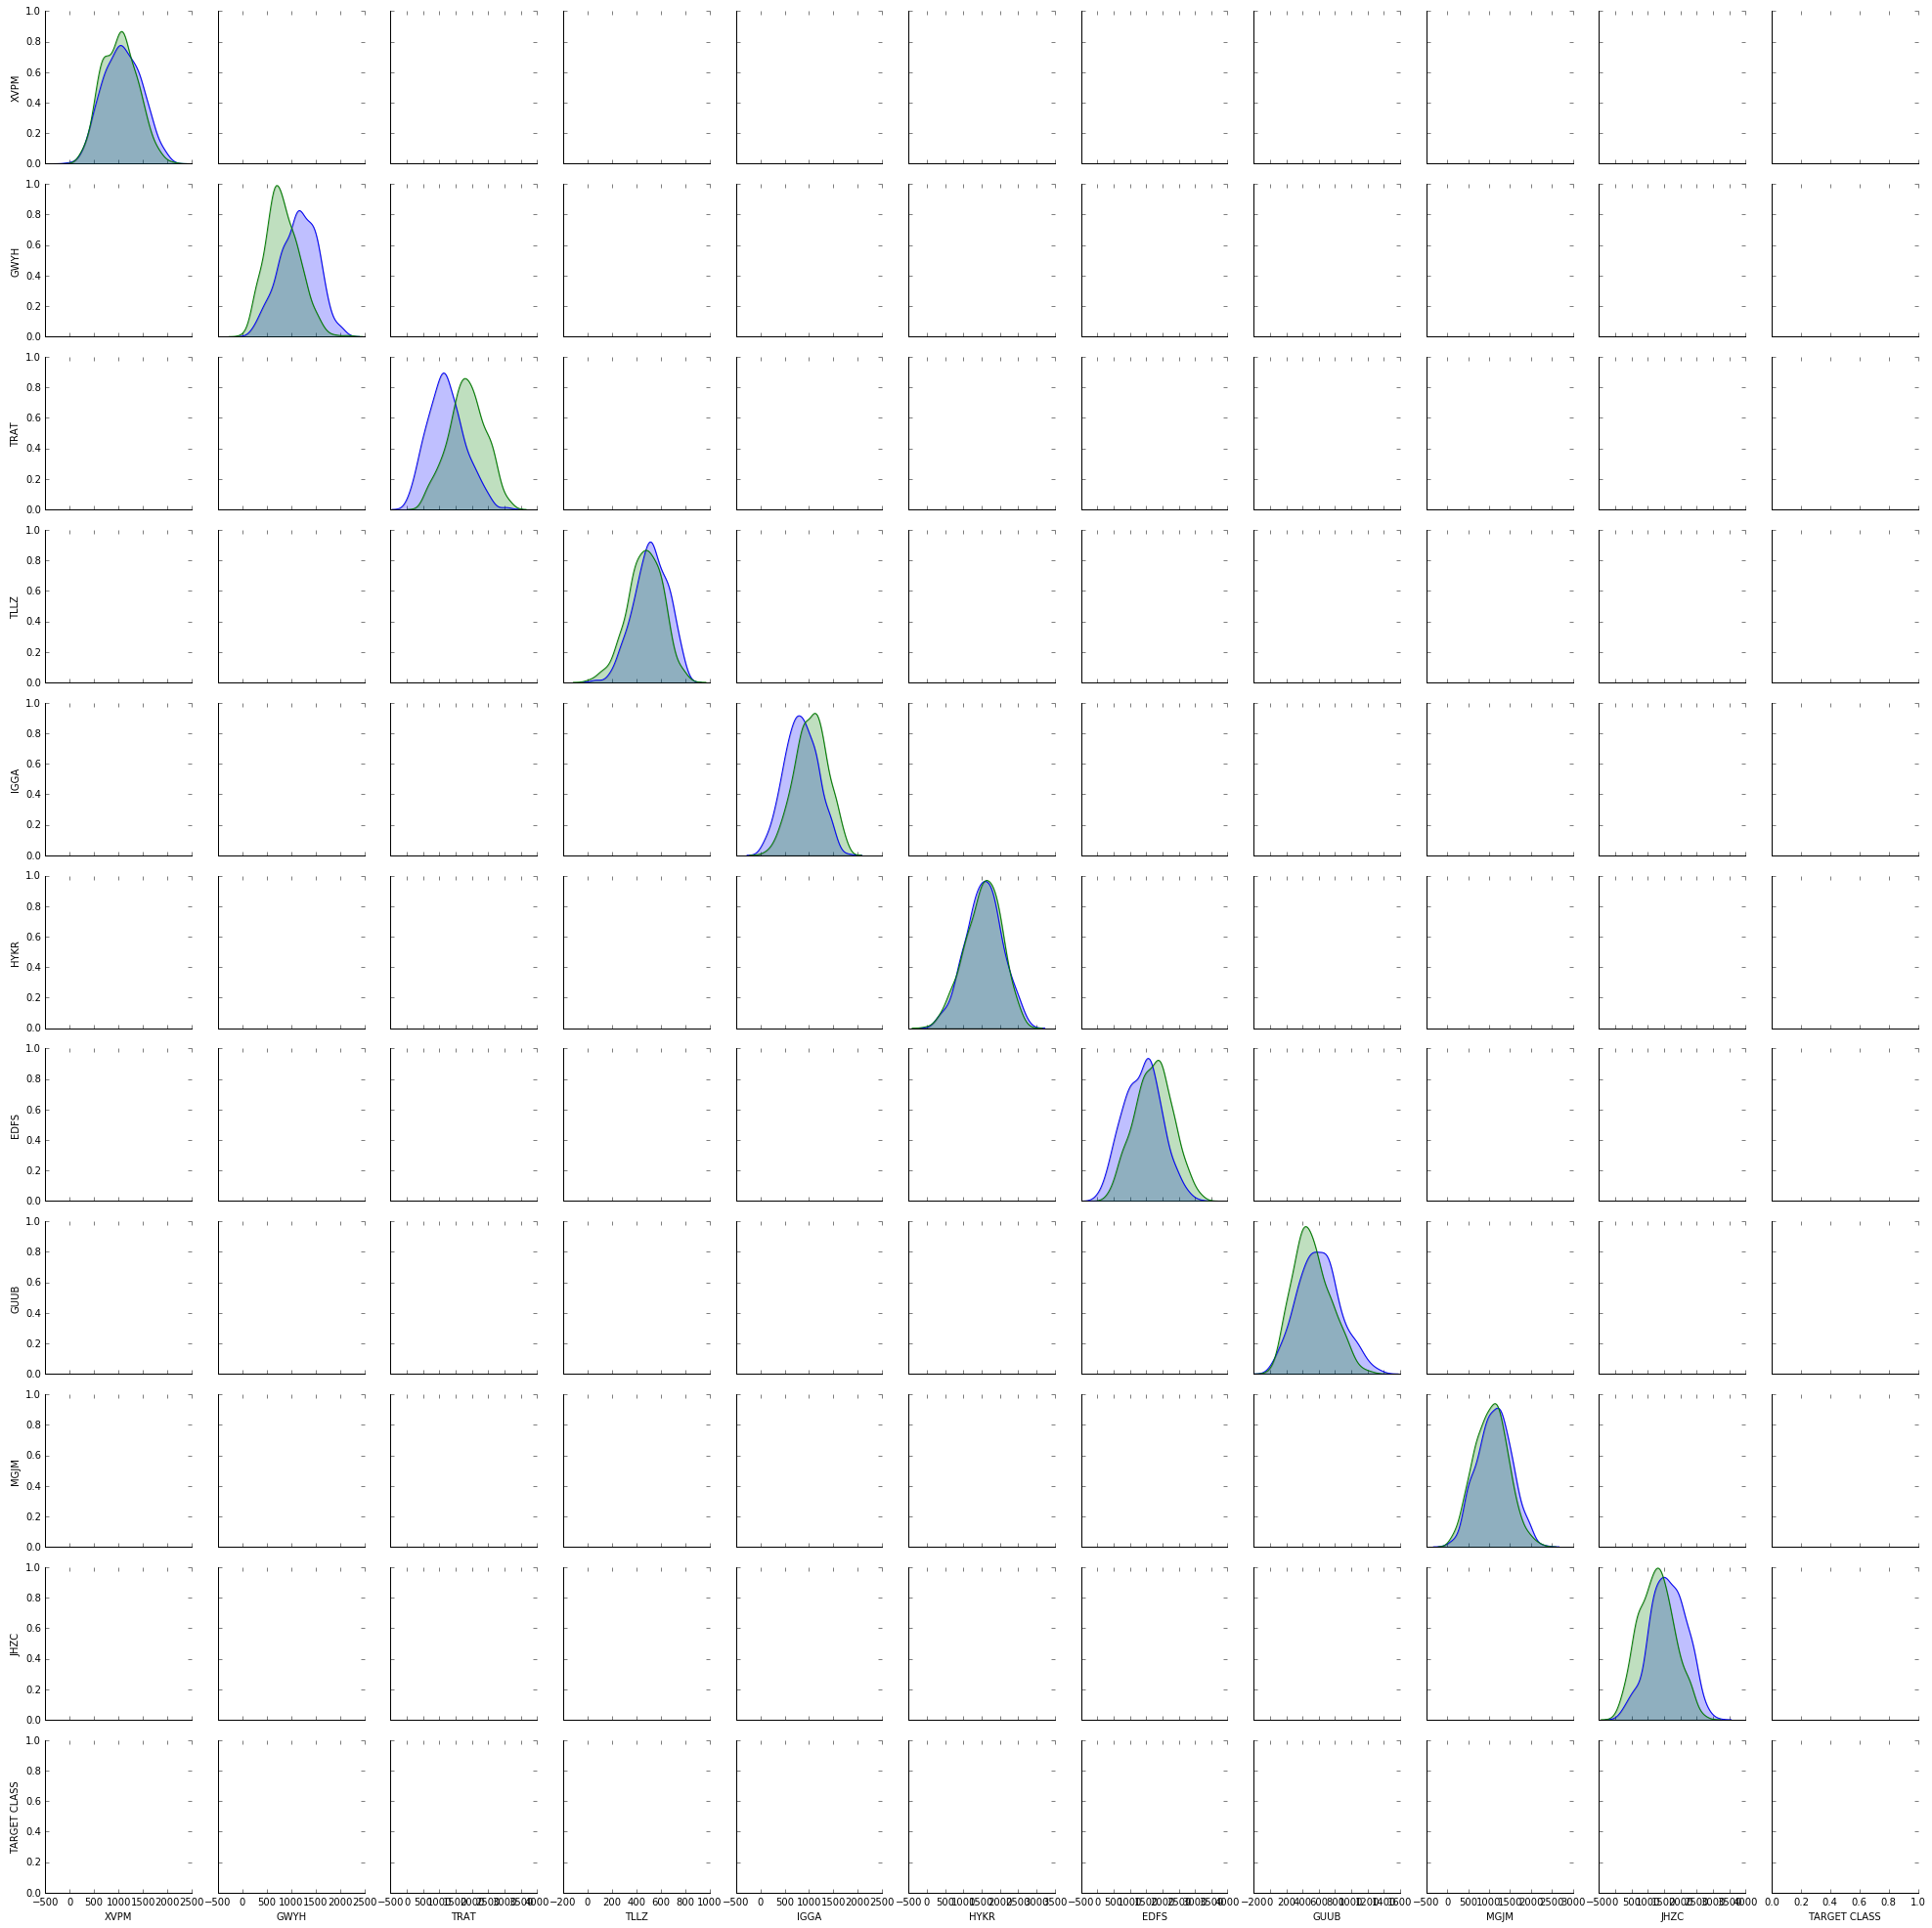

In [4]:
sns.pairplot(df,hue="TARGET CLASS")

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [6]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [7]:
scaler=StandardScaler()

** Fit scaler to the features.**

In [10]:
df1=df.drop('TARGET CLASS',axis=1)
df2=df["TARGET CLASS"]
a=scaler.fit(df1)


**Use the .transform() method to transform the features to a scaled version.**

In [11]:
scaled_features=a.transform(df1)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [12]:
df_features=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_features.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df_features
y=df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [16]:
model=KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [17]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [20]:
preds=model.predict(X_test)

** Create a confusion matrix and classification report.**

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
print(confusion_matrix(y_test,preds))

[[110  36]
 [ 47 107]]


In [23]:
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

          0       0.70      0.75      0.73       146
          1       0.75      0.69      0.72       154

avg / total       0.73      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [31]:
error=[]
for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    predcs=model.predict(X_test)
    error.append(np.mean(predcs!=y_test))
    

**Now create the following plot using the information from your for loop.**

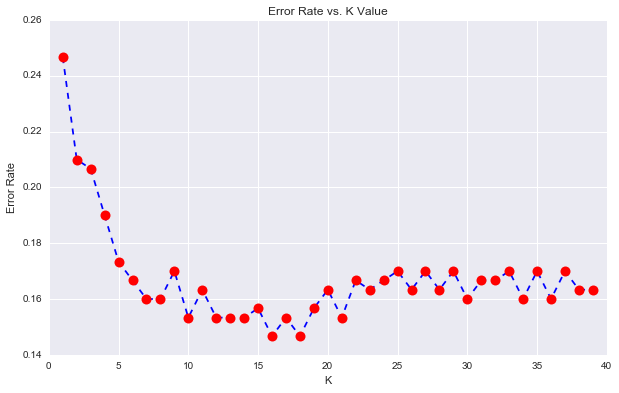

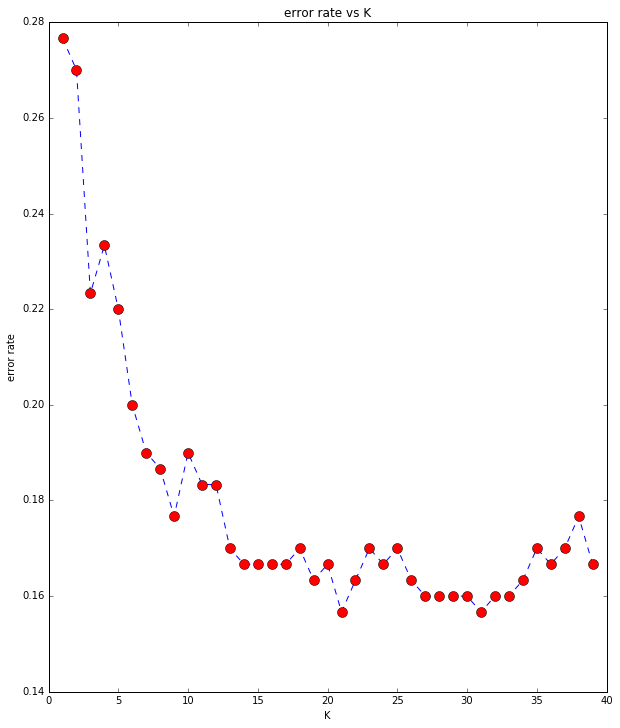

In [35]:
plt.figure(figsize=(10,12))
plt.plot(range(1,40),error,color='b',linestyle='--',marker='o',markerfacecolor='r',markersize=10)
plt.title('error rate vs K')
plt.xlabel('K')
plt.ylabel('error rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [41]:
model=KNeighborsClassifier(n_neighbors=21)
model.fit(X_train,y_train)
pre=model.predict(X_test)
print(confusion_matrix(y_test,pre))

print(classification_report(y_test,pre))

[[125  21]
 [ 26 128]]
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       146
          1       0.86      0.83      0.84       154

avg / total       0.84      0.84      0.84       300



# Great Job!